In [191]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import openweathermapy as ow

from config import api_key


In [2]:
                                                    #PSEUDOCODE

#create an array of cities based on lat and long
    #generate random coordnates - check
    #use citipy to generate nearest city - check
        #make sure cities are unique
#loop through array
    #in the loop, make an api call to each city and append data to a list:
    #put weather data - lat, temp, humidity, clouds, wind speed into separate lists
#create dataframe with weather data and city name
#plot data from dataframe

In [167]:
#create an array of cities based on lat and long
    #generate random coordnates - check
coord = []
tup = ()
for limit in range(1000):
    lat, long = np.random.uniform(-180,180), np.random.uniform(-90, 90)
    tup = (lat,long)
    coord.append(tup)
coord

[(101.38127487907661, 41.48523046313693),
 (-160.82059928825308, -21.367443777495538),
 (-0.6908821410530095, -56.103574313538964),
 (15.623978116840874, 1.9668018440747943),
 (-128.0261964327043, -87.88452995863489),
 (81.93086186193625, 46.01904678397227),
 (-9.120897350547665, 82.2646991532751),
 (39.91486570008078, 81.4364150795395),
 (142.10400569480538, 7.34687276063363),
 (-26.249881485552805, -16.353526974171814),
 (163.48290930276983, -69.95108078302164),
 (71.4494934978024, -54.919613688820135),
 (-115.87893687367223, 70.3237140184253),
 (-38.27811693250072, 6.9835142576272204),
 (89.94216533062558, -21.430483959187427),
 (-159.27093661034905, 70.6987458683295),
 (41.87680709313378, 48.31490441118237),
 (-164.06734630716142, -43.23134975384983),
 (-163.89570378922002, -76.98283464141521),
 (-74.8612024601685, -45.23341331045755),
 (-26.318302463224455, 16.210967380829246),
 (40.5065322732481, 18.020275044495293),
 (-71.44933973456905, 61.3604728368436),
 (49.58699353463871, 8

In [168]:
#use citipy to generate nearest city - check
empty = []
for i in range(0,len(coord)):
    city = citipy.nearest_city(coord[i][0], coord[i][1])
    empty.append(city.city_name)

#Make sure cities are unique    
city_list = []
for j in empty:
    if j not in city_list:
        city_list.append(j)
    else:
        city = citipy.nearest_city(np.random.uniform(-180,180), np.random.uniform(-90, 90))
        city_new = city.city_name
        empty.append(city_new)
                  
#Check if cities are unique:
city_set = set(empty)
if len(city_set) == len(city_list):
    print("Cities are unique")
city_list

Cities are unique


['belushya guba',
 'ushuaia',
 'oriximina',
 'ouallam',
 'hithadhoo',
 'aksu',
 'barentsburg',
 'jamestown',
 'qaanaaq',
 'upernavik',
 'port alfred',
 'saldanha',
 'illoqqortoormiut',
 'albany',
 'belidzhi',
 'bethanien',
 'san pietro vernotico',
 'taolanaro',
 'zyryanovsk',
 'cidreira',
 'peniche',
 'amargosa',
 'narsaq',
 'port elizabeth',
 'glace bay',
 'stephenville',
 'laguna',
 'belozerskoye',
 'hermanus',
 'cape town',
 'amalner',
 'bantry',
 'camara de lobos',
 'bredasdorp',
 'mahibadhoo',
 'muros',
 'havoysund',
 'longyearbyen',
 'torbay',
 'grand river south east',
 'canning',
 'east london',
 'pangnirtung',
 'busselton',
 'kruisfontein',
 'dhidhdhoo',
 'cuamba',
 'ilulissat',
 'mahebourg',
 'surt',
 'sakakah',
 'uni',
 'boa vista',
 'mocuba',
 'klaksvik',
 'dikson',
 'carnarvon',
 'urengoy',
 'summerside',
 'beyneu',
 'gikongoro',
 'williamsport',
 'saint anthony',
 'bridgewater',
 'saint-francois',
 'kisangani',
 'kavaratti',
 'malwan',
 'tsumeb',
 'hofn',
 'lenggries',
 '

In [169]:
len(city_list)

1000

In [170]:
#Do the api call:
settings = {"units": "metric", "appid": api_key}
weather_data = []

#Loop through the city list and catch for 404 errors for cities that don't have weather data
for city in city_list:
    if len(weather_data) > 700:
        break
    else:
        try:
            weather_data.append([ow.get_current(city, **settings)])        
        except Exception as err:
            print("Weather data for " +city+" could not be found")
            continue


Weather data for belushya guba could not be found
Weather data for barentsburg could not be found
Weather data for illoqqortoormiut could not be found
Weather data for taolanaro could not be found
Weather data for bantry could not be found
Weather data for grand river south east could not be found
Weather data for sakakah could not be found
Weather data for malwan could not be found
Weather data for amderma could not be found
Weather data for baboua could not be found
Weather data for kemijarvi could not be found
Weather data for litoral del san juan could not be found
Weather data for tasbuget could not be found
Weather data for bababe could not be found
Weather data for acarau could not be found
Weather data for asfi could not be found
Weather data for saryshagan could not be found
Weather data for bengkulu could not be found
Weather data for olafsvik could not be found
Weather data for barbar could not be found
Weather data for provadija could not be found
Weather data for tumannyy 

In [162]:
weather_data

[[{'base': 'stations',
   'clouds': {'all': 8},
   'cod': 200,
   'coord': {'lat': -31.62, 'lon': -60.7},
   'dt': 1520987454,
   'id': 3836277,
   'main': {'grnd_level': 1018.96,
    'humidity': 77,
    'pressure': 1018.96,
    'sea_level': 1022.74,
    'temp': 22.07,
    'temp_max': 22.07,
    'temp_min': 22.07},
   'name': 'Santa Fe',
   'sys': {'country': 'AR',
    'message': 0.0034,
    'sunrise': 1521021720,
    'sunset': 1521066081},
   'weather': [{'description': 'clear sky',
     'icon': '02n',
     'id': 800,
     'main': 'Clear'}],
   'wind': {'deg': 203.5, 'speed': 1.17}}],
 [{'base': 'stations',
   'clouds': {'all': 20},
   'cod': 200,
   'coord': {'lat': -54.81, 'lon': -68.31},
   'dt': 1520985600,
   'id': 3833367,
   'main': {'humidity': 49,
    'pressure': 981,
    'temp': 8,
    'temp_max': 8,
    'temp_min': 8},
   'name': 'Ushuaia',
   'sys': {'country': 'AR',
    'id': 4754,
    'message': 0.0047,
    'sunrise': 1521022960,
    'sunset': 1521068452,
    'type': 1},

In [194]:
#Create Dataframe to hold Weather Data:
data_list = []
names = []
for item in weather_data:
    for response in item:
        data = ( response['main']['temp'], response['main']['humidity'], response['wind']['speed'],
            response['clouds']['all'],  response['coord']['lat'],    response['coord']['lon']) 
        name = (response['name'])
        names.append(name)
        data_list.append(data)


#put weather data - lat, temp, humidity, clouds, wind speed into separate lists
weather_data_df = pd.DataFrame(data_list)
column_names = ["Temp","Humidity","Wind Speed","Cloudiness(%)", "Latitude", "Longitude"]
weather_data_df = pd.DataFrame(data_list, index = names , columns=column_names)


In [198]:
x = weather_data_df['Latitude']
weather_data_df.to_csv('Weather_Data.csv')
weather_data_df.head(10)

,Temp,Humidity,Wind Speed,Cloudiness(%),Latitude,Longitude
Ushuaia,8.00,49,3.10,20,-54.81,-68.31
Oriximina,23.92,100,1.77,80,-1.77,-55.87
Ouallam,20.57,41,1.27,12,14.32,2.08
Hithadhoo,28.62,100,2.67,64,-0.60,73.08
Aksu,-15.00,77,5.00,0,52.04,76.93
Jamestown,16.62,95,2.07,0,-33.21,138.60
Qaanaaq,-23.54,100,1.07,56,77.48,-69.36
Upernavik,-16.64,98,0.72,64,72.79,-56.15
Port Alfred,21.27,92,4.92,36,-33.59,26.89
Saldanha,9.47,91,4.37,92,41.42,-6.55


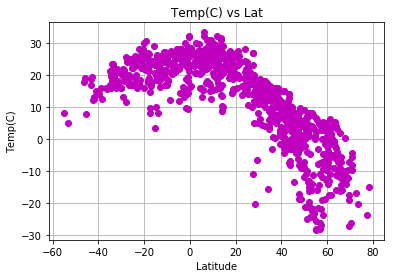

In [199]:
#TEMP VS LAT
y_t = weather_data_df["Temp"]
plt.plot(x,y_t,'mo')
plt.xlabel("Latitude")
plt.ylabel("Temp(C)")
plt.title("Temp(C) vs Lat")
plt.grid()
plt.savefig("Temp vs Lat")
plt.show()

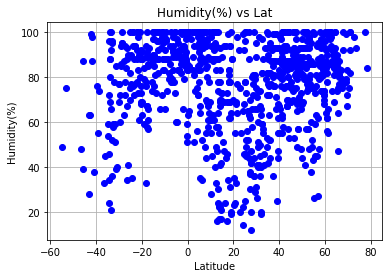

In [186]:
#HUMIDITY VS LAT
y_h = weather_data_df["Humidity"]
plt.plot(x,y_h,'bo')
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Humidity(%) vs Lat")
plt.grid()
plt.savefig("Humidity vs Lat")
plt.show()

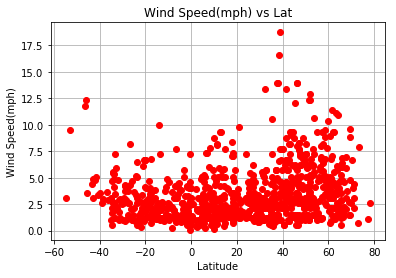

In [187]:
#WIND SPEED VS LAT
y_ws = weather_data_df["Wind Speed"]
plt.plot(x,y_ws,'ro')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Wind Speed(mph) vs Lat")
plt.grid()
plt.savefig("Wind Speed vs Lat")
plt.show()

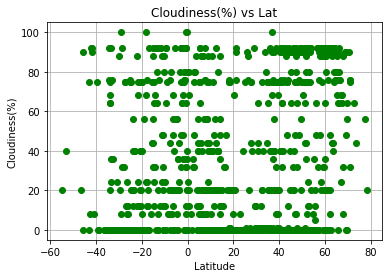

In [188]:
#CLOUDINESS VS LAT
y_c = weather_data_df["Cloudiness(%)"]
plt.plot(x,y_c,'go')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Cloudiness(%) vs Lat")
plt.grid()
plt.savefig("Cloudiness vs Lat")
plt.show()